In [1]:
!pip install pytest-warnings

  Obtaining dependency information for pytest-warnings from https://files.pythonhosted.org/packages/01/2f/74fecb0fd1a87272fd29af0c41ea86992a070c47373447b6a544f257c4e0/pytest_warnings-0.3.1-py2.py3-none-any.whl.metadata


# importing libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
pd.set_option("display.max_columns",None)
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Importing the Dataset

In [2]:
Lead = pd.read_csv('Leads.csv (1).zip')
Lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
Lead.shape

(9240, 37)

In [4]:
Lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
Lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# Step 2: Data_Cleaning

In [6]:
Lead.isnull()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9236,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9237,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9238,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False


In [7]:
Lead.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [8]:
Lead.drop(columns=["Prospect ID","Lead Number"], axis = 1, inplace = True)

In [9]:
cat_cols = list(Lead.select_dtypes(include='object').columns)
cat_cols

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [10]:
for col in cat_cols:
    print(col, ":",Lead[col].value_counts())
    print("\n\n\t--------------------------\n\n")

Lead Origin : Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64


	--------------------------


Lead Source : Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64


	--------------------------


Do Not Email : Do Not Email
No     8506
Yes     734
Name: count, dtype: int64


	--------------------------


Do Not Call : Do

In [11]:
sel_cols = ["How did you hear about X Education","Lead Profile","City","Specialization"]


In [12]:
Lead[sel_cols] = Lead[sel_cols].replace("Select", np.nan,inplace = True)

In [13]:
Lead.isnull().mean()*100

Lead Origin                                        0.000000
Lead Source                                        0.389610
Do Not Email                                       0.000000
Do Not Call                                        0.000000
Converted                                          0.000000
TotalVisits                                        1.482684
Total Time Spent on Website                        0.000000
Page Views Per Visit                               1.482684
Last Activity                                      1.114719
Country                                           26.634199
Specialization                                   100.000000
How did you hear about X Education               100.000000
What is your current occupation                   29.112554
What matters most to you in choosing a course     29.318182
Search                                             0.000000
Magazine                                           0.000000
Newspaper Article                       

In [14]:
cols = Lead.columns
cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [15]:
for col in cols:
    if Lead[col].isnull().mean()*100 > 40:
        Lead.drop(col,axis = 1, inplace = True)

In [16]:
Lead.isnull().mean()*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Newspaper                                         0.0000

In [17]:
cols = Lead.columns
for col in cols:
    if (Lead[col].isnull().mean()*100 < 15) and (Lead[col].dtype == 'object'):
        Lead[col].replace(np.nan,Lead[col].mode()[0],inplace = True)

In [18]:
Lead.isnull().mean()*100

Lead Origin                                       0.000000
Lead Source                                       0.000000
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     0.000000
Country                                          26.634199
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Newspaper                                         0.0000

In [19]:
cols = Lead.columns
for col in cols:
    if (Lead[col].isnull().mean()*100 > 15) and (Lead[col].dtype == 'object'):
        Lead[col].replace(np.nan,Lead[col].mode()[0],inplace = True)

In [20]:
Lead.isnull().mean()*100

Lead Origin                                      0.000000
Lead Source                                      0.000000
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    0.000000
Country                                          0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Forums                               0.000000
Newspaper                                        0.000000
Digital Advert

In [21]:
Lead = Lead[~pd.isnull(Lead['TotalVisits'])]

In [22]:
Lead.isnull().sum().any()

False

# Step 3: ED_Analysis

In [23]:
Lead['Country'].value_counts(dropna=False)

Country
India                   8816
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malays

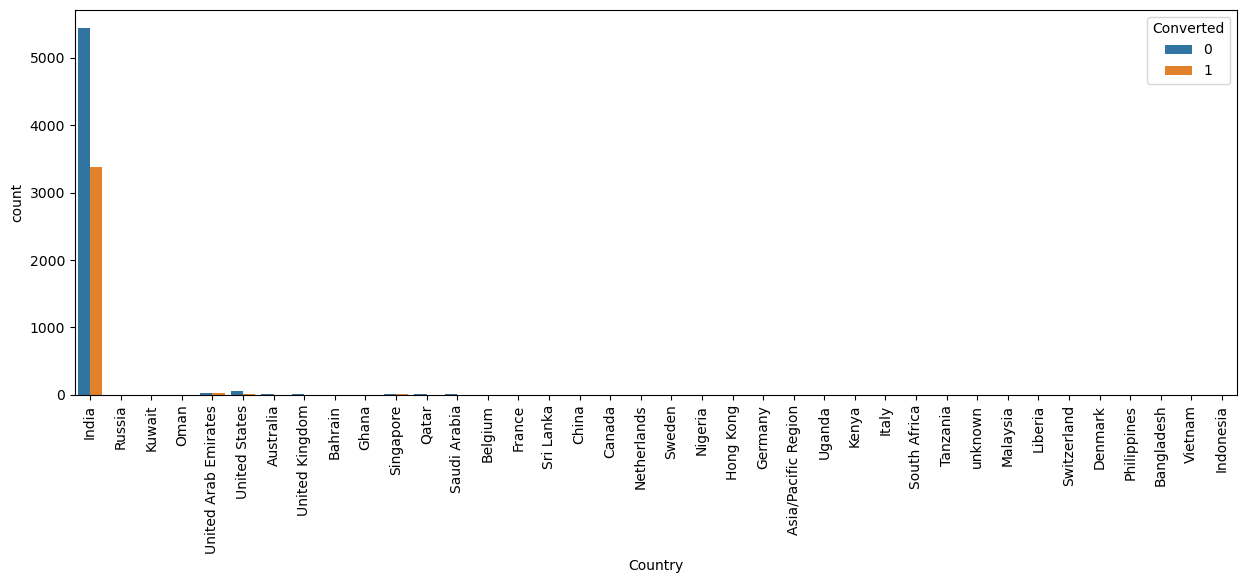

In [24]:
plt.figure(figsize=(15, 5))
s1 = sns.countplot(x='Country', hue='Converted', data=Lead)
s1.set_xticklabels(s1.get_xticklabels(), rotation=90)
plt.show()

In [25]:
cat_cols = list(Lead.select_dtypes(include='object'))
cat_cols

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Country',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

Prospect ID


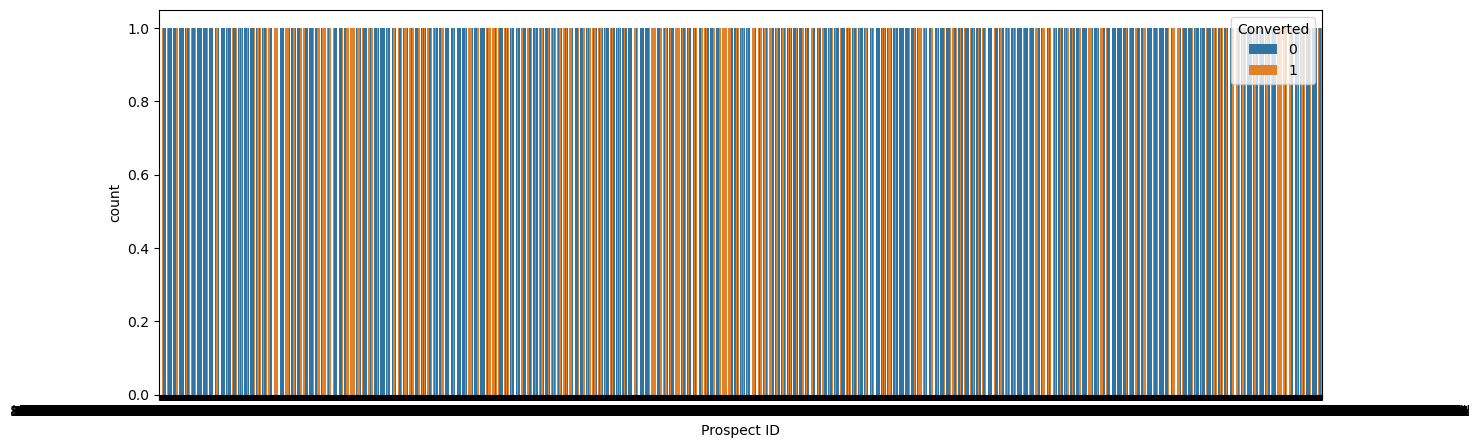

Lead Origin


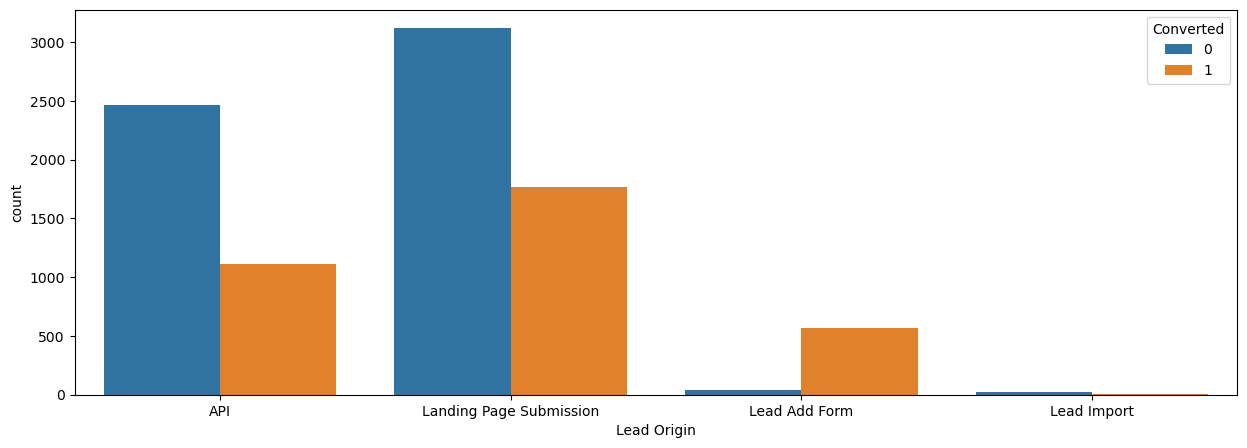

Lead Source


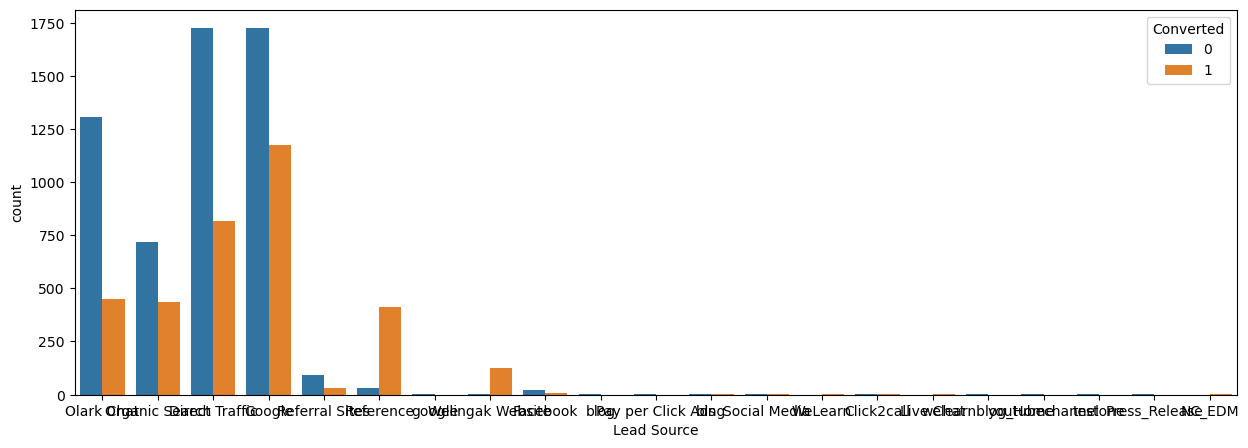

Do Not Email


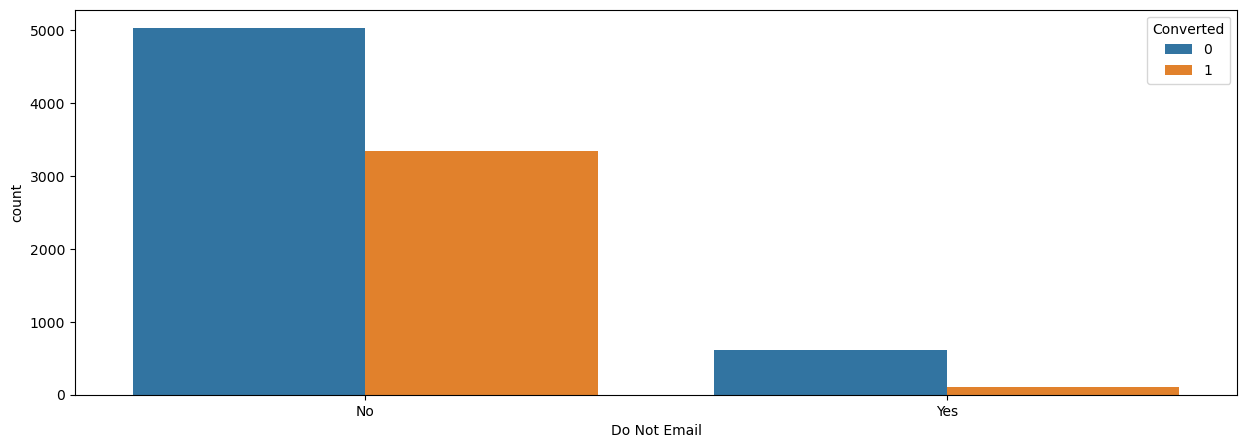

Do Not Call


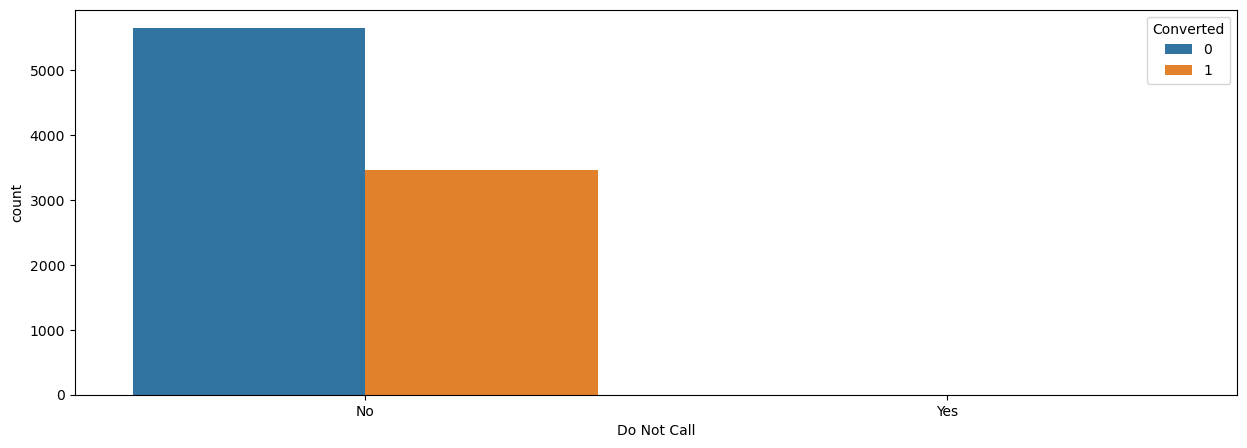

Last Activity


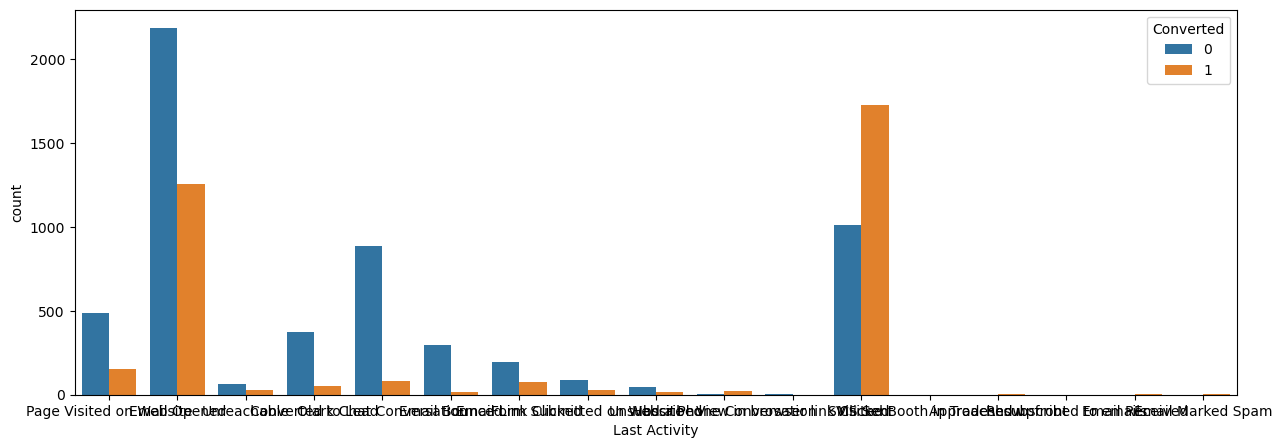

Country


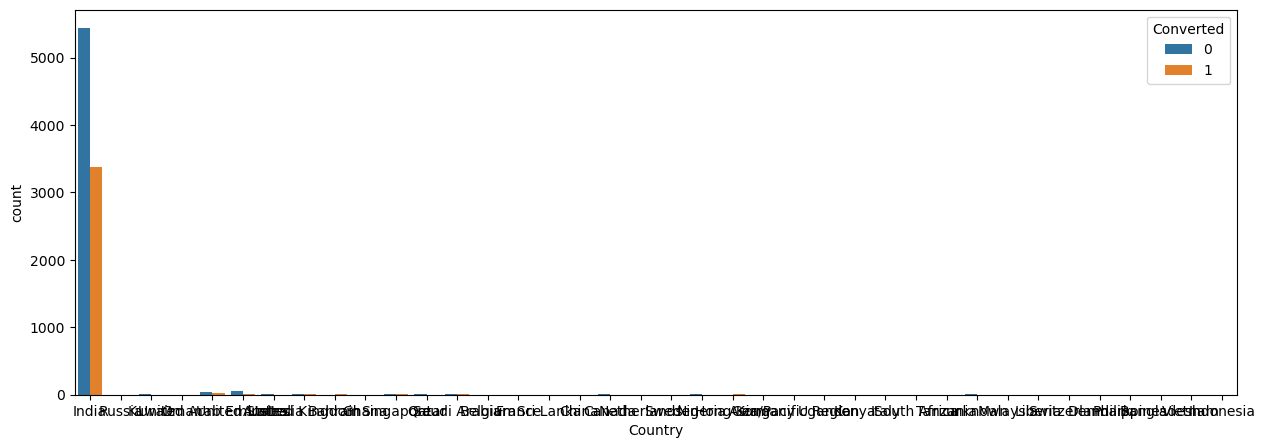

What is your current occupation


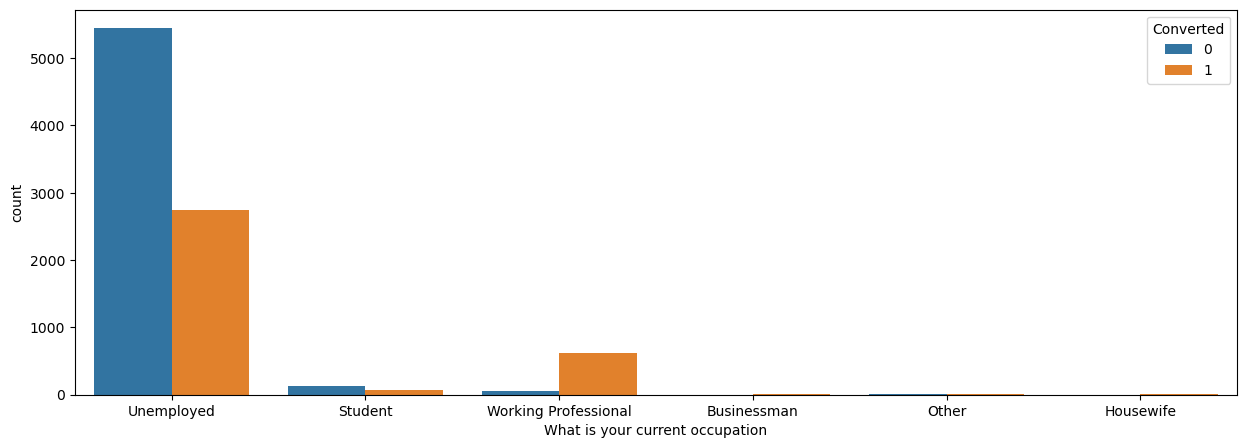

What matters most to you in choosing a course


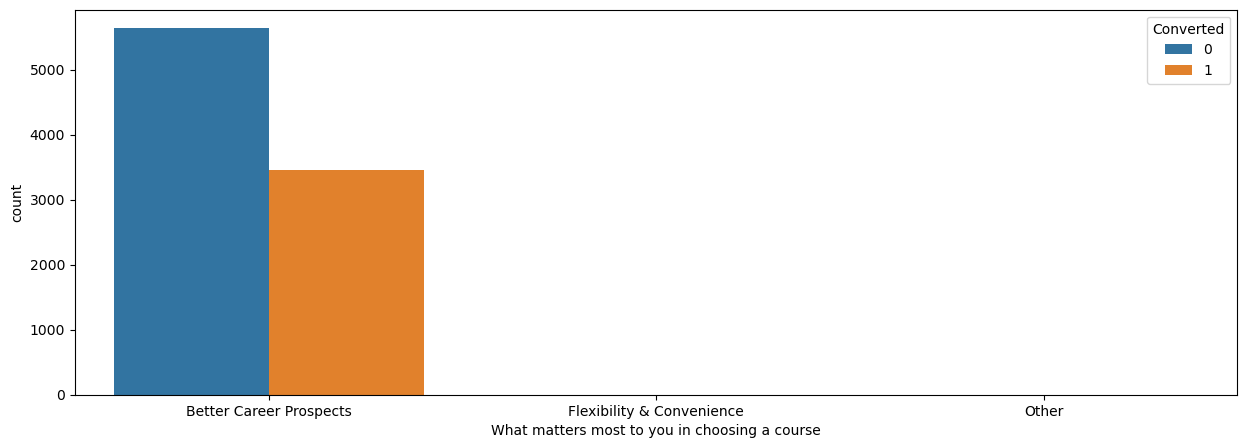

Search


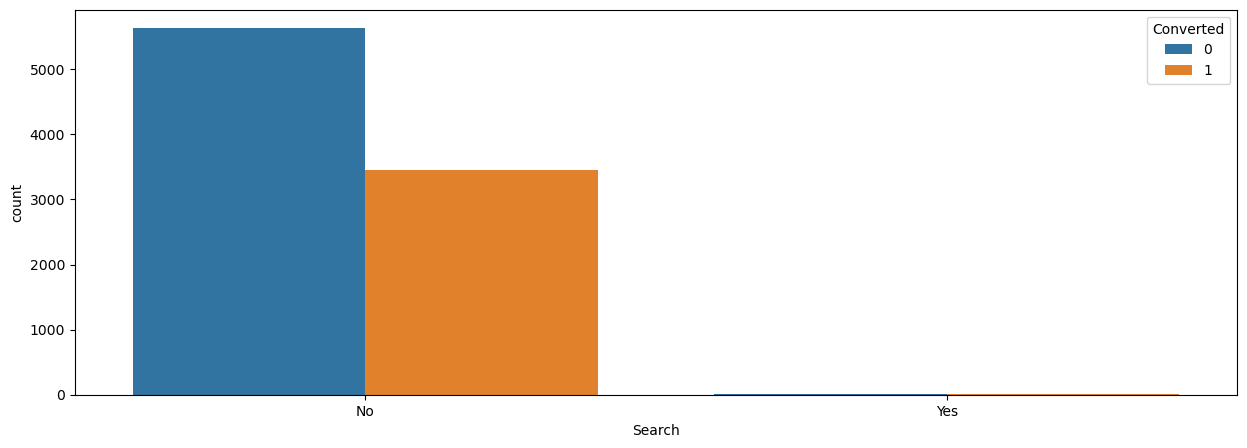

Magazine


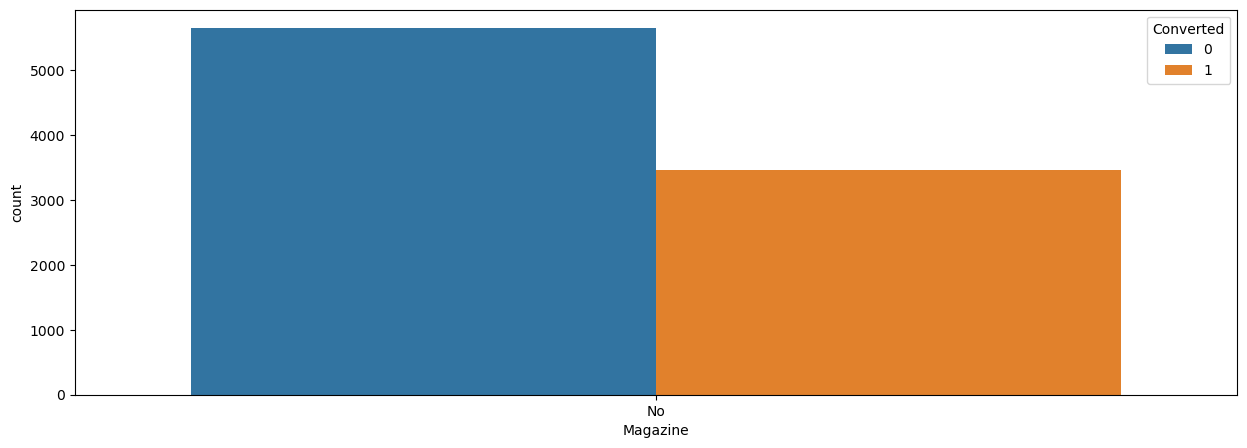

Newspaper Article


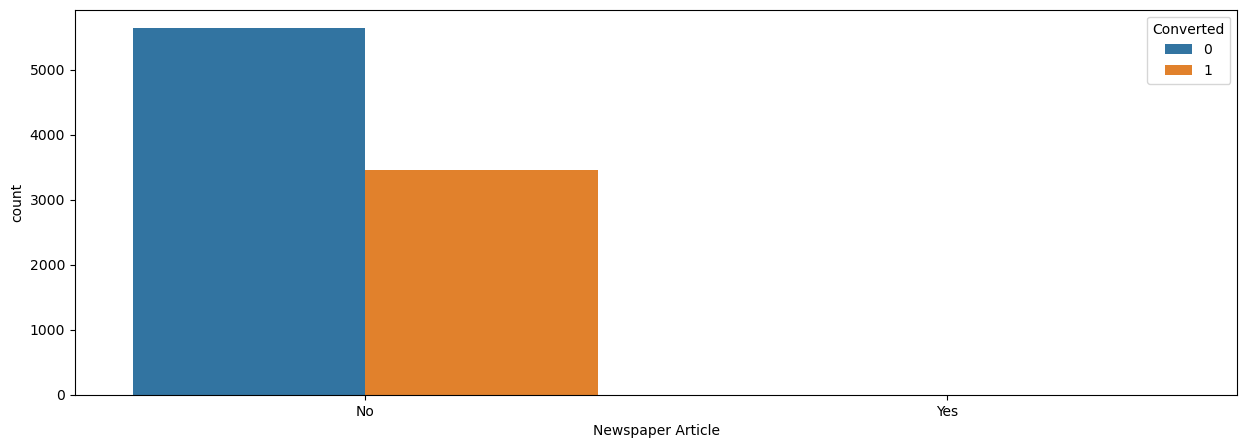

X Education Forums


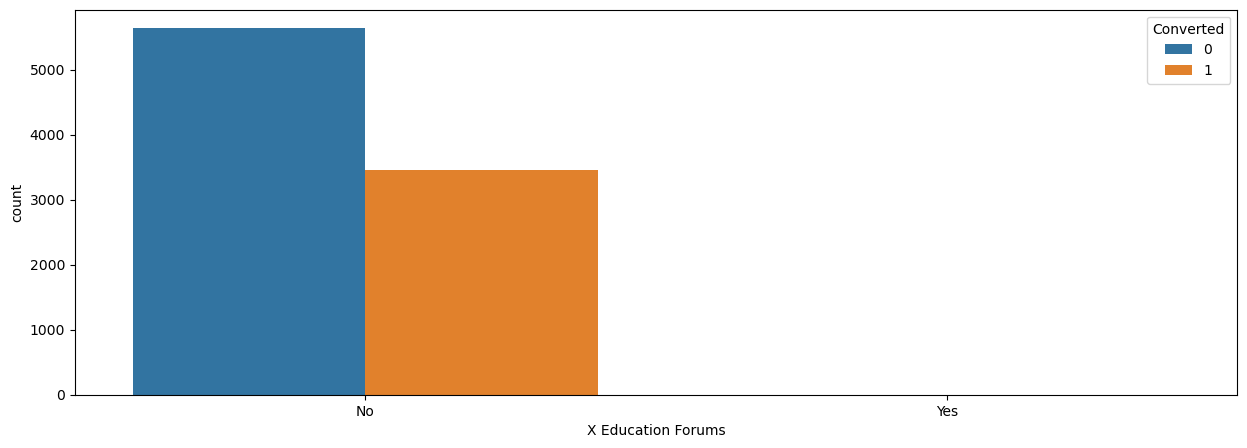

Newspaper


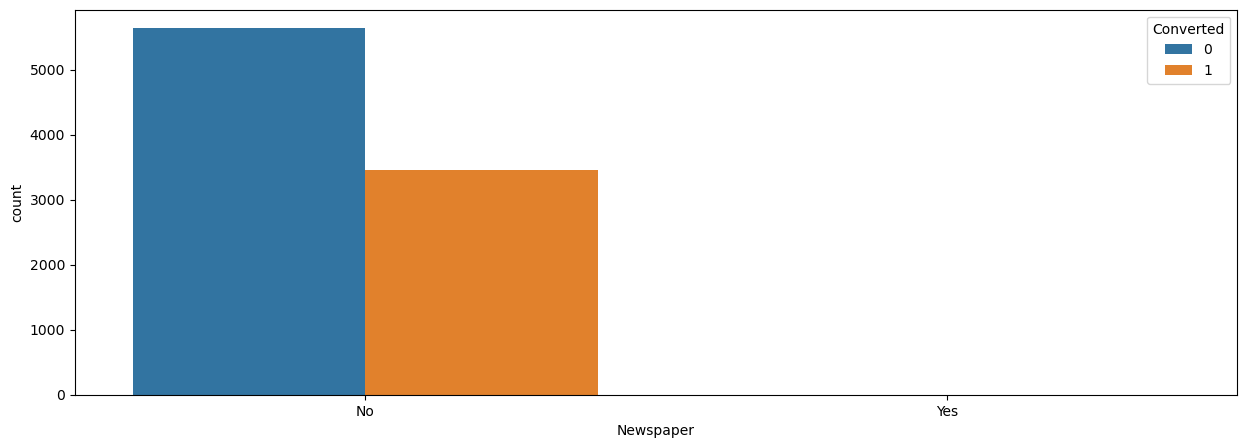

Digital Advertisement


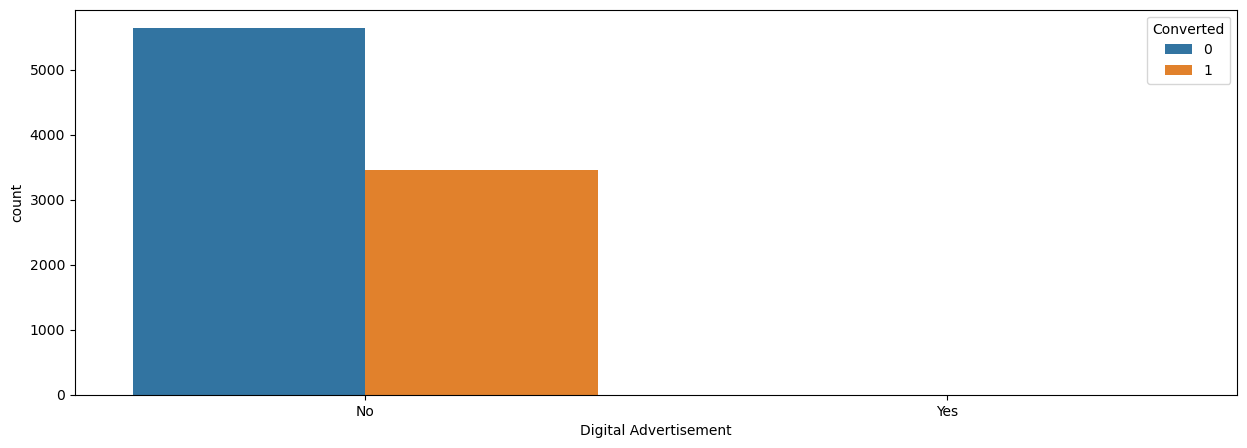

Through Recommendations


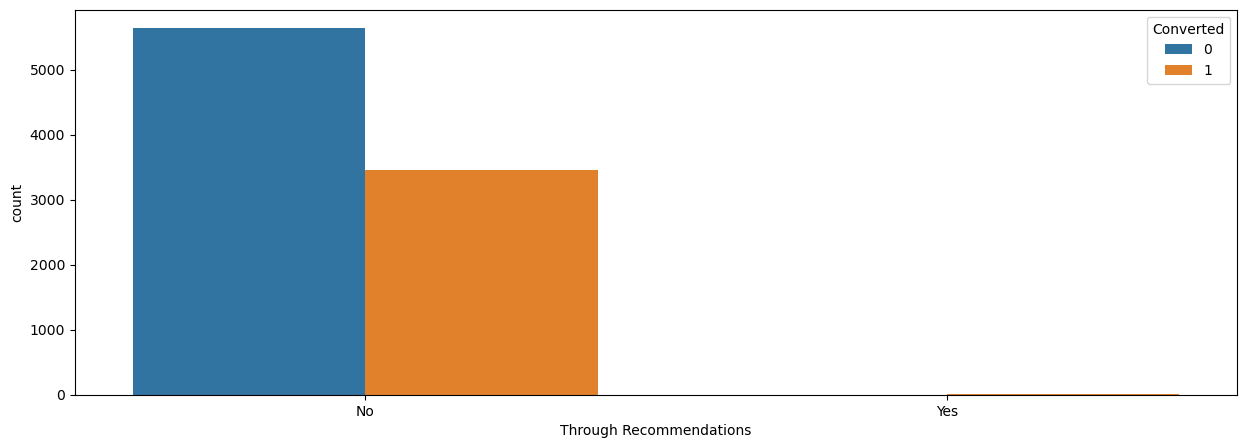

Receive More Updates About Our Courses


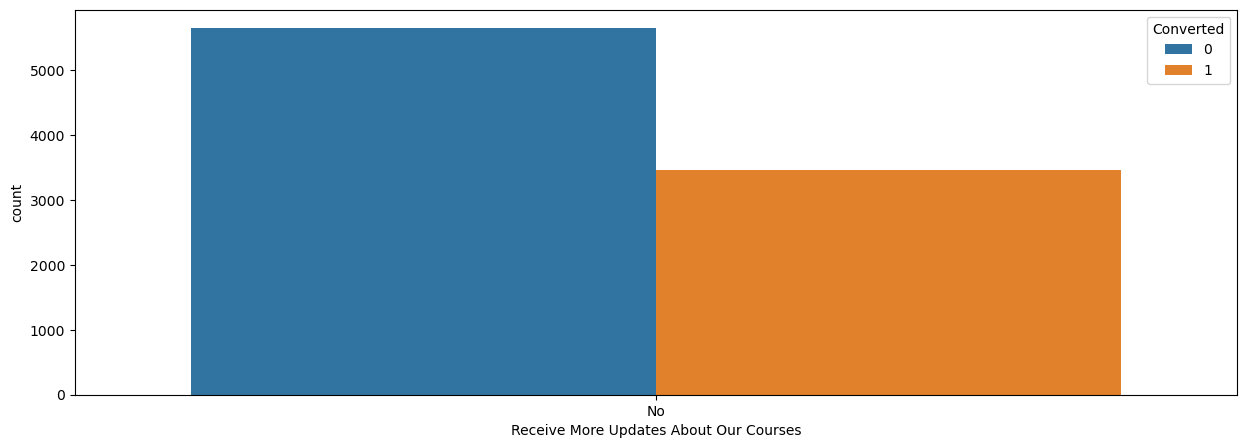

Tags


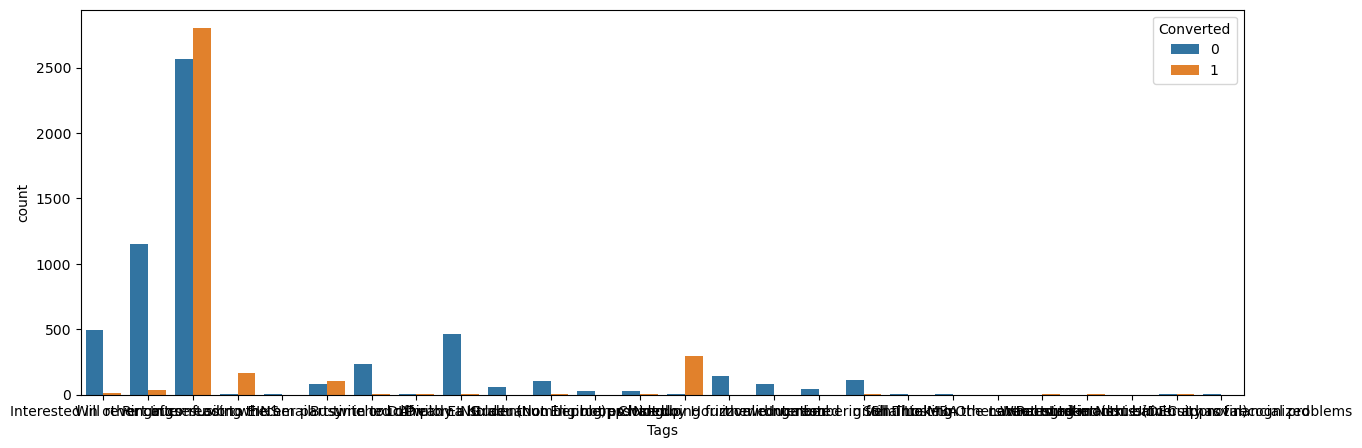

Update me on Supply Chain Content


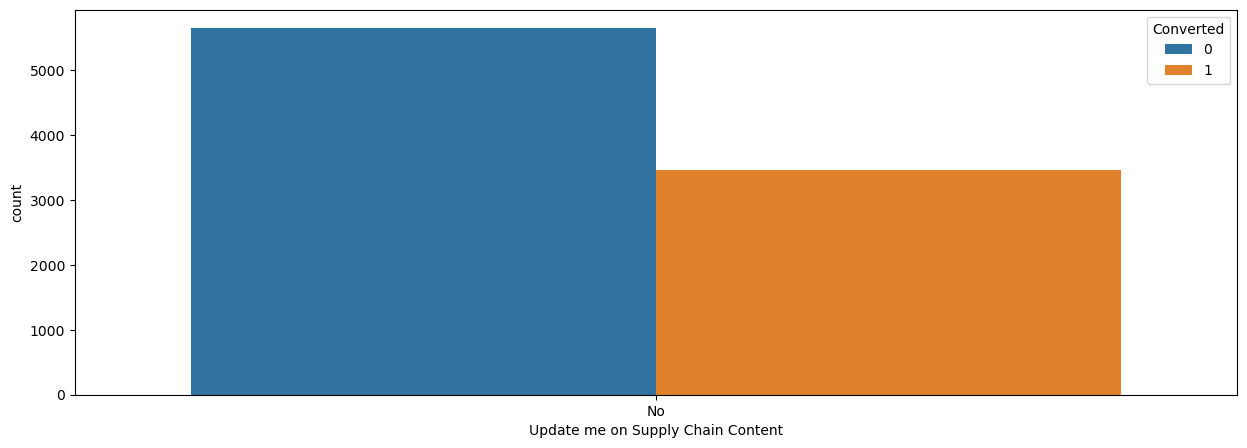

Get updates on DM Content


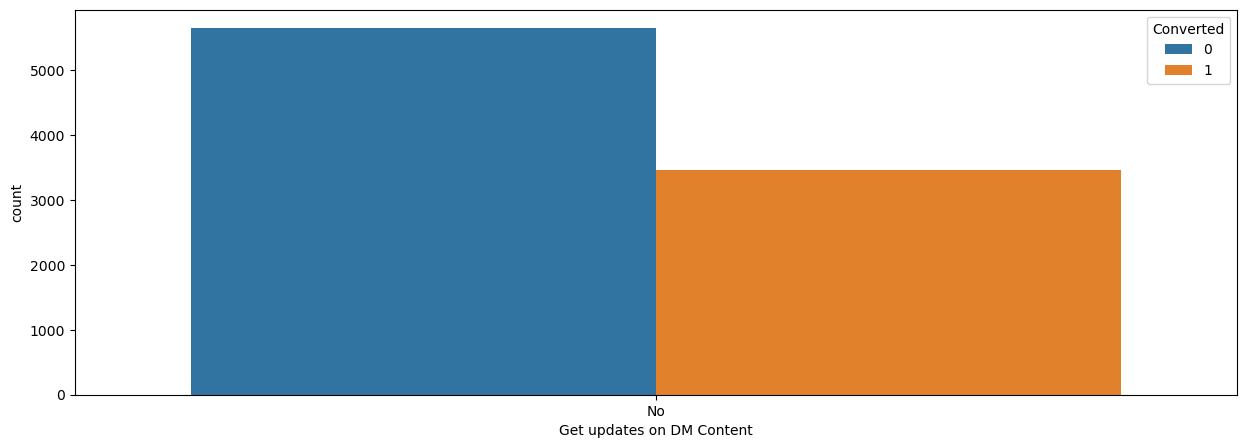

I agree to pay the amount through cheque


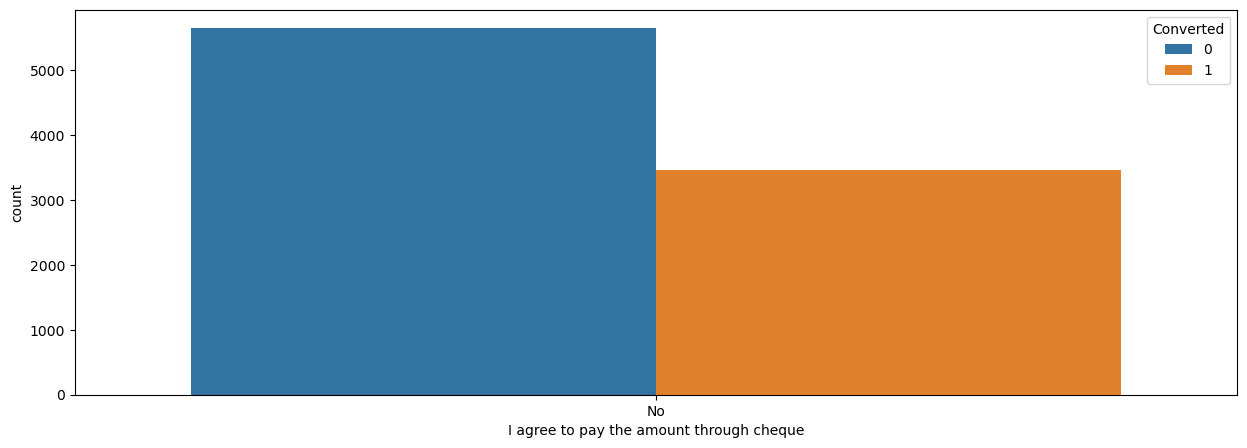

A free copy of Mastering The Interview


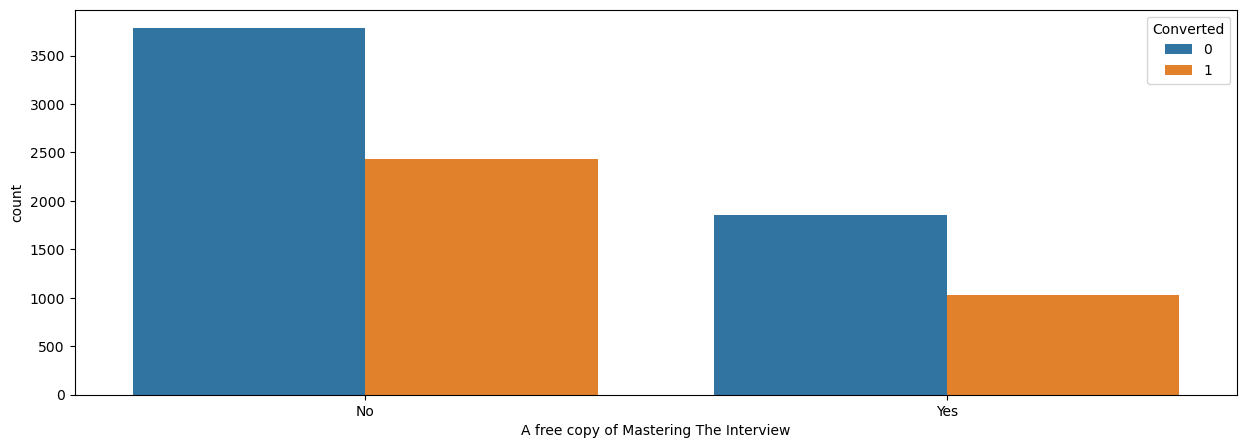

Last Notable Activity


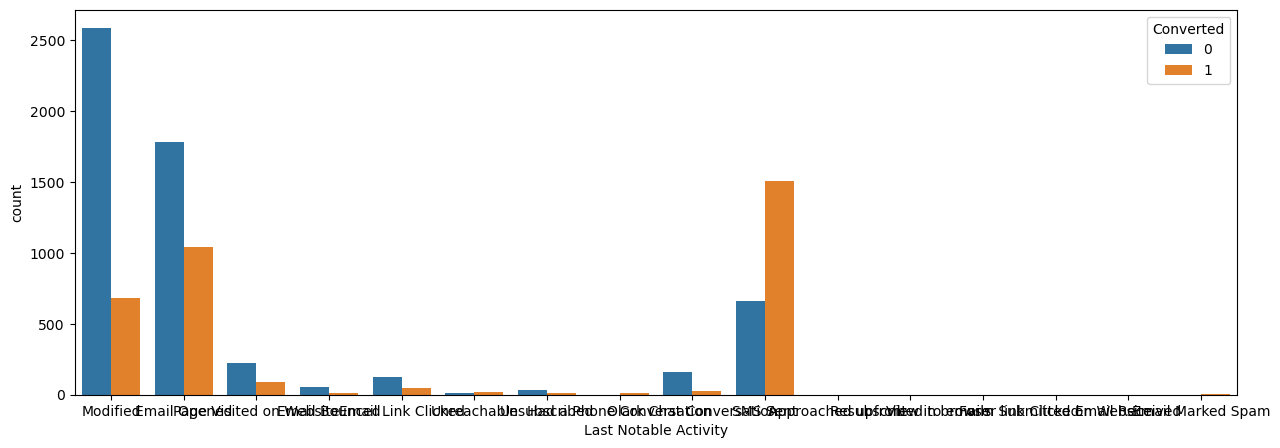

In [65]:
for col in cat_cols:
    print(col)
    plt.figure(figsize=(15, 5))
    sns.countplot(x = col, hue = 'Converted', data=Lead)
    plt.show()

In [26]:
Lead.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9103 non-null   object 
 1   Lead Source                                    9103 non-null   object 
 2   Do Not Email                                   9103 non-null   object 
 3   Do Not Call                                    9103 non-null   object 
 4   Converted                                      9103 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9103 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9103 non-null   object 
 9   Country                                        9103 non-n

<Figure size 1000x1000 with 0 Axes>

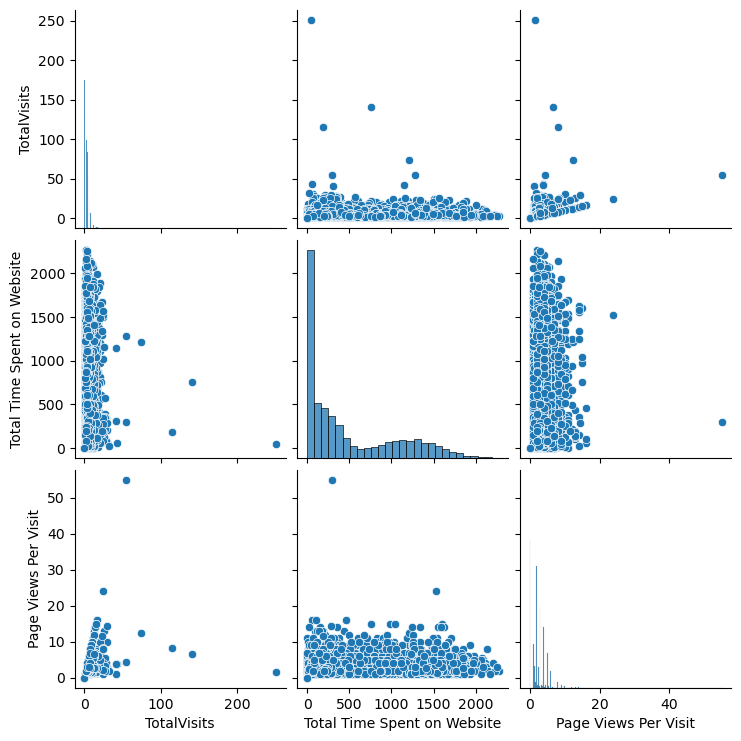

In [27]:
num_col = ["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]
plt.figure(figsize=(10, 10))
sns.pairplot(Lead[num_col])
plt.show()

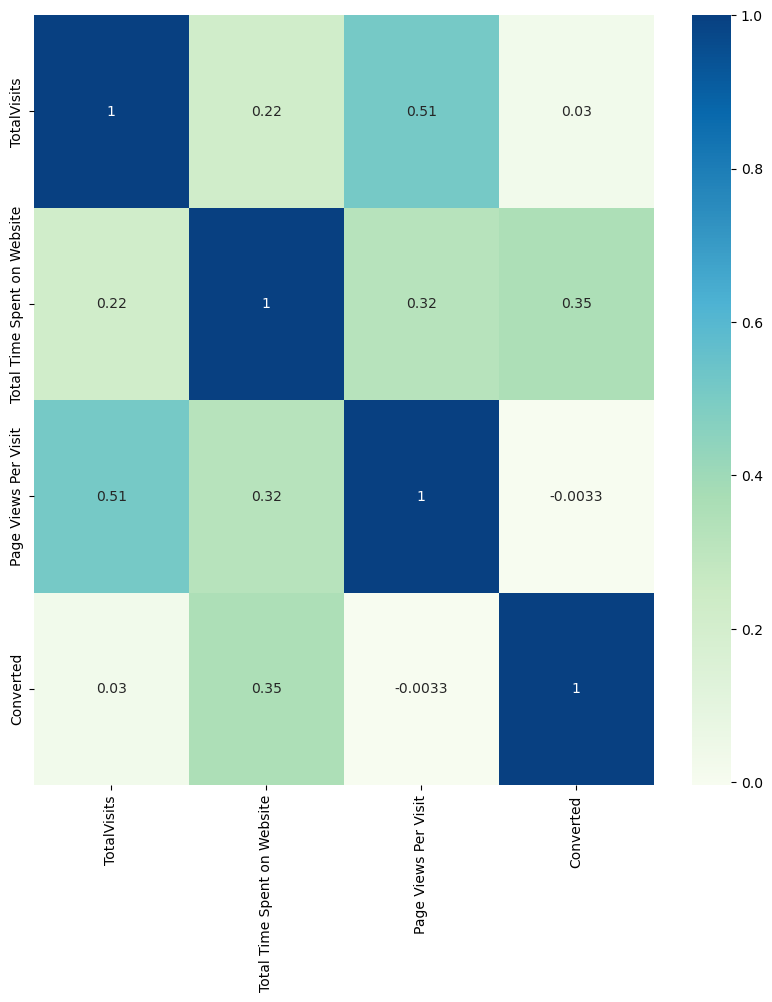

In [28]:
num_col = Lead[["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit", "Converted"]]

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(num_col.corr(), annot=True, cmap='GnBu')
plt.show()

# Step 4: Data_Preparation

In [29]:
#mapping the binary columns to 0 n 1
binary_cols = ["Do Not Email","Do Not Call","Through Recommendations","Receive More Updates About Our Courses",
               "Update me on Supply Chain Content","I agree to pay the amount through cheque",
               "A free copy of Mastering The Interview","Search","Magazine","Newspaper Article",
              "Newspaper","X Education Forums","Digital Advertisement","Get updates on DM Content"]

In [30]:
Lead[binary_cols] = Lead[binary_cols].apply(lambda x: x.map({"Yes": 1, "No": 0}))
Lead.head()


,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,0,0,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,0,0,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,0,0,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,0,0,Modified


In [31]:
cat_cols = list(Lead.select_dtypes(include='object'))
cat_cols

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Country',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Last Notable Activity']

In [32]:
Lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,0,0,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,0,0,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,0,0,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,0,0,Modified


In [33]:
##import pandas as pd

# Create dummy variables for categorical columns
cat_cols_dum = pd.get_dummies(Lead[cat_cols], dtype=int)

# Check the result
cat_cols_dum.head()


,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Asia/Pacific Region,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [34]:
Lead_final = pd.concat([cat_cols_dum,Lead],axis = 1)

In [35]:
Lead_final

,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Asia/Pacific Region,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Cours

In [36]:
Lead_final.drop(cat_cols, axis= 1, inplace = True)

In [37]:
Lead_final

,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Asia/Pacific Region,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Maste

In [38]:
x = Lead_final.drop("Converted",axis = 1)

In [39]:
y = Lead_final["Converted"]

In [40]:
x

,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Asia/Pacific Region,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The I

# Step 5: Train-Test-Split_ModelBuilding

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.3,random_state = 100)

In [43]:
scaler = StandardScaler()
x_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]]= scaler.fit_transform(x_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])

In [44]:
x_train.head()

,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Click2call,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Approached upfront,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_Asia/Pacific Region,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,What is your current occupation_Businessman,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_Other,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,Last Notable Activity_Approached upfront,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The I

In [45]:
converted = sum(Lead['Converted'])/len(Lead['Converted'].index)
converted	

0.38020432824343625

# Step 6: ML_Model_Building

In [46]:
#import the libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import precision_recall_curve

In [47]:
x_train.shape

(6372, 148)

In [48]:
loggregg = LogisticRegression()
rfe = RFE(loggregg, n_features_to_select= 15)
rfe.fit(x_train,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [49]:
rfe.support_

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False,  True,
        True,  True, False, False, False, False, False, False,  True,
        True, False, False, False,  True, False, False, False, False,
        True, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,

In [50]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('Lead Origin_API', False, 5),
 ('Lead Origin_Landing Page Submission', False, 6),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 36),
 ('Lead Source_Click2call', False, 86),
 ('Lead Source_Direct Traffic', False, 76),
 ('Lead Source_Facebook', False, 81),
 ('Lead Source_Google', False, 85),
 ('Lead Source_Live Chat', False, 97),
 ('Lead Source_NC_EDM', False, 45),
 ('Lead Source_Olark Chat', False, 31),
 ('Lead Source_Organic Search', False, 106),
 ('Lead Source_Pay per Click Ads', False, 119),
 ('Lead Source_Press_Release', False, 128),
 ('Lead Source_Reference', False, 54),
 ('Lead Source_Referral Sites', False, 51),
 ('Lead Source_Social Media', False, 32),
 ('Lead Source_WeLearn', False, 63),
 ('Lead Source_Welingak Website', False, 9),
 ('Lead Source_bing', False, 59),
 ('Lead Source_blog', False, 44),
 ('Lead Source_google', False, 28),
 ('Lead Source_testone', False, 113),
 ('Lead Source_welearnblog_Home', False, 60),
 ('Lead Source_youtubechannel

In [51]:
col = x_train.columns[rfe.support_]
col

Index(['Lead Origin_Lead Add Form', 'Last Activity_Had a Phone Conversation',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Tags_Already a student', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lateral student', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_wrong number given', 'Last Notable Activity_SMS Sent',
       'Do Not Email'],
      dtype='object')

In [52]:
x_train.columns[~rfe.support_]

Index(['Lead Origin_API', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Lead Source_Click2call',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat',
       ...
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview'],
      dtype='object', length=133)

# Model 1
 ## Assessing The Model with statsmodel

In [53]:
x_train_sm = sm.add_constant(x_train[col])
logml = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
res = logml.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2114.0
Date:                Mon, 30 Sep 2024   Deviance:                       4227.9
Time:                        01:29:00   Pearson chi2:                 1.09e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4853
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.2715      0.356     -6.386      0.000      -2.969      -1.574
Lead Origin_Lead Add Form                                2.7671      0.250     11.069      0.000       2.277       3.257
Last Activity_Had a Phone Conversation                   2.3198      0.740      3.135      0.002       0.869       3.770
What is your current occupation_Unemployed              -1.7664      0.310     -5.693      0.000      -2.374      -1.158
What is your current occupation_Working Professional     1.1765      0.375      3.136      0.002       0.441       1.912
Tags_Already a student                                  -1.3266      0.635     -2.089      0.037      -2.571      -0.082
Tags_Busy                                                2.9775      0.302      9.854      0.000       2.385       3.570
Tags_Closed by Horizzon                                  7.9605      0.744     10.696      0.000       6.502       9.419
Tags_Lateral student                                    26.7653   3.69e+04      0.001      0.999   -7.23e+04    7.24e+04
Tags_Lost to EINS                                        8.0830      0.745     10.845      0.000       6.622       9.544
Tags_Ringing                                            -1.3589      0.317     -4.290      0.000      -1.980      -0.738
Tags_Will revert after reading the email                 3.2760      0.210     15.580      0.000       2.864       3.688
Tags_switched off                                       -1.5284      0.627     -2.436      0.015      -2.758      -0.299
Tags_wrong number given                                -20.6516   1.21e+04     -0.002      0.999   -2.38e+04    2.37e+04
Last Notable Activity_SMS Sent                           2.6217      0.105     24.921      0.000       2.416       2.828
Do Not Email                                            -1.4355      0.181     -7.935      0.000      -1.790      -1.081
========================================================================================================================
"""

In [54]:
y_train_pred = res.predict(x_train_sm)
y_train[:10]

7962    0
5520    0
1962    0
1566    1
9170    0
5097    0
8954    0
309     1
5519    1
1050    1
Name: Converted, dtype: int64

In [55]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train[:10]

7962    0
5520    0
1962    0
1566    1
9170    0
5097    0
8954    0
309     1
5519    1
1050    1
Name: Converted, dtype: int64

In [56]:
y_train_pred_final =pd.DataFrame({'Converted_val': y_train.values,'Converted': y_train_pred})
y_train_pred_final

,Converted_val,Converted
0,0,0.195264
1,0,0.257243
2,0,0.003810
3,1,0.898534
4,0,0.004658
...,...,...
6367,0,0.318240
6368,1,0.898534
6369,1,0.995636
6370,1,0.991860


In [57]:
y_train_pred_final['predicted'] = y_train_pred_final['Converted'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted_val,Converted,predicted
0,0,0.195264,0
1,0,0.257243,0
2,0,0.003810,0
3,1,0.898534,1
4,0,0.004658,0


In [58]:
print(y_train_pred_final.columns)


Index(['Converted_val', 'Converted', 'predicted'], dtype='object')


In [59]:
cm = metrics.confusion_matrix(y_train_pred_final["Converted_val"], y_train_pred_final["predicted"])
cm

array([[3805,  148],
       [ 744, 1675]], dtype=int64)

In [60]:
acc = metrics.accuracy_score(y_train_pred_final["Converted_val"], y_train_pred_final["predicted"])
acc
                             

0.8600125549278091

## checking VIFs

In [61]:
vif = pd.DataFrame()
vif['features'] = x_train[col].columns
vif['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

In [62]:
vif

,features,VIF
2,What is your current occupation_Unemployed,6.24
10,Tags_Will revert after reading the email,5.06
9,Tags_Ringing,1.93
3,What is your current occupation_Working Profes...,1.59
13,Last Notable Activity_SMS Sent,1.49
6,Tags_Closed by Horizzon,1.36
0,Lead Origin_Lead Add Form,1.24
4,Tags_Already a student,1.22
11,Tags_switched off,1.19
5,Tags_Busy,1.16


In [63]:
col = col.drop('Tags_Busy', 1)
col

Index(['Lead Origin_Lead Add Form', 'Last Activity_Had a Phone Conversation',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Lateral student', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_wrong number given', 'Last Notable Activity_SMS Sent',
       'Do Not Email'],
      dtype='object')

# Model 2

In [64]:
x_train_sm = sm.add_constant(x_train[col])
logml2 = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
res = logml2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2167.9
Date:                Mon, 30 Sep 2024   Deviance:                       4335.8
Time:                        01:29:37   Pearson chi2:                 1.13e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4766
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4101      0.303     -4.650      0.000      -2.004      -0.816
Lead Origin_Lead Add Form                                2.6963      0.245     11.021      0.000       2.217       3.176
Last Activity_Had a Phone Conversation                   2.3374      0.740      3.158      0.002       0.887       3.788
What is your current occupation_Unemployed              -1.6008      0.288     -5.550      0.000      -2.166      -1.036
What is your current occupation_Working Professional     1.1358      0.348      3.264      0.001       0.454       1.818
Tags_Already a student                                  -2.2468      0.611     -3.676      0.000      -3.445      -1.049
Tags_Closed by Horizzon                                  6.9423      0.726      9.563      0.000       5.519       8.365
Tags_Lateral student                                    25.7257   3.67e+04      0.001      0.999   -7.19e+04    7.19e+04
Tags_Lost to EINS                                        7.0591      0.727      9.710      0.000       5.634       8.484
Tags_Ringing                                            -2.5276      0.269     -9.410      0.000      -3.054      -2.001
Tags_Will revert after reading the email                 2.2332      0.131     16.999      0.000       1.976       2.491
Tags_switched off                                       -2.7006      0.605     -4.465      0.000      -3.886      -1.515
Tags_wrong number given                                -21.8134    1.2e+04     -0.002      0.999   -2.35e+04    2.35e+04
Last Notable Activity_SMS Sent                           2.8014      0.106     26.392      0.000       2.593       3.009
Do Not Email                                            -1.4487      0.180     -8.050      0.000      -1.801      -1.096
========================================================================================================================
"""

In [65]:
vif1 = pd.DataFrame()
vif1['features'] = x_train[col].columns
vif1['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif1['VIF'] = round(vif['VIF'], 2)
vif1 = vif1.sort_values(by = "VIF", ascending = False)
vif1

,features,VIF
2,What is your current occupation_Unemployed,6.24
10,Tags_switched off,5.06
9,Tags_Will revert after reading the email,1.93
3,What is your current occupation_Working Profes...,1.59
13,Do Not Email,1.49
6,Tags_Lateral student,1.36
0,Lead Origin_Lead Add Form,1.24
4,Tags_Already a student,1.22
11,Tags_wrong number given,1.19
5,Tags_Closed by Horizzon,1.16


In [66]:
col = col.drop('Tags_Lateral student', 1)
col

Index(['Lead Origin_Lead Add Form', 'Last Activity_Had a Phone Conversation',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Tags_Already a student', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_wrong number given', 'Last Notable Activity_SMS Sent',
       'Do Not Email'],
      dtype='object')

# Model 3

In [67]:
x_train_sm = sm.add_constant(x_train[col])
logml2 = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
res = logml2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2174.1
Date:                Mon, 30 Sep 2024   Deviance:                       4348.2
Time:                        01:29:47   Pearson chi2:                 1.12e+04
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4755
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.3852      0.302     -4.583      0.000      -1.978      -0.793
Lead Origin_Lead Add Form                                2.6985      0.244     11.047      0.000       2.220       3.177
Last Activity_Had a Phone Conversation                   2.3357      0.740      3.156      0.002       0.885       3.786
What is your current occupation_Unemployed              -1.5929      0.288     -5.536      0.000      -2.157      -1.029
What is your current occupation_Working Professional     1.1361      0.347      3.272      0.001       0.456       1.817
Tags_Already a student                                  -2.2748      0.611     -3.725      0.000      -3.472      -1.078
Tags_Closed by Horizzon                                  6.9097      0.726      9.521      0.000       5.487       8.332
Tags_Lost to EINS                                        7.0266      0.727      9.669      0.000       5.602       8.451
Tags_Ringing                                            -2.5536      0.268     -9.524      0.000      -3.079      -2.028
Tags_Will revert after reading the email                 2.2019      0.130     16.919      0.000       1.947       2.457
Tags_switched off                                       -2.7262      0.605     -4.509      0.000      -3.911      -1.541
Tags_wrong number given                                -21.8390    1.2e+04     -0.002      0.999   -2.35e+04    2.35e+04
Last Notable Activity_SMS Sent                           2.7934      0.106     26.399      0.000       2.586       3.001
Do Not Email                                            -1.4500      0.180     -8.068      0.000      -1.802      -1.098
========================================================================================================================
"""

In [68]:
vif2 = pd.DataFrame()
vif2['features'] = x_train[col].columns
vif2['VIF'] = [variance_inflation_factor(x_train[col].values, i) for i in range(x_train[col].shape[1])]
vif2['VIF'] = round(vif['VIF'], 2)
vif2 = vif2.sort_values(by = "VIF", ascending = False)
vif2

,features,VIF
2,What is your current occupation_Unemployed,6.24
10,Tags_wrong number given,5.06
9,Tags_switched off,1.93
3,What is your current occupation_Working Profes...,1.59
6,Tags_Lost to EINS,1.36
0,Lead Origin_Lead Add Form,1.24
4,Tags_Already a student,1.22
11,Last Notable Activity_SMS Sent,1.19
5,Tags_Closed by Horizzon,1.16
8,Tags_Will revert after reading the email,1.14


In [69]:
col = col.drop('Tags_Lost to EINS', 1)
col

Index(['Lead Origin_Lead Add Form', 'Last Activity_Had a Phone Conversation',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Tags_Already a student', 'Tags_Closed by Horizzon', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Tags_wrong number given', 'Last Notable Activity_SMS Sent',
       'Do Not Email'],
      dtype='object')

In [70]:
y_train_pred = res.predict(x_train_sm)
y_train[:10]

7962    0
5520    0
1962    0
1566    1
9170    0
5097    0
8954    0
309     1
5519    1
1050    1
Name: Converted, dtype: int64

In [71]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train[:10]

7962    0
5520    0
1962    0
1566    1
9170    0
5097    0
8954    0
309     1
5519    1
1050    1
Name: Converted, dtype: int64

In [72]:
y_train_pred_final =pd.DataFrame({'Converted_val': y_train.values,'Converted': y_train_pred})
y_train_pred_final

,Converted_val,Converted
0,0,0.453948
1,0,0.048425
2,0,0.003321
3,1,0.875761
4,0,0.005205
...,...,...
6367,0,0.315139
6368,1,0.875761
6369,1,0.994572
6370,1,0.991391


In [73]:
y_train_pred_final['predicted'] = y_train_pred_final['Converted'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted_val,Converted,predicted
0,0,0.453948,0
1,0,0.048425,0
2,0,0.003321,0
3,1,0.875761,1
4,0,0.005205,0


In [74]:
cm = metrics.confusion_matrix(y_train_pred_final["Converted_val"], y_train_pred_final["predicted"])
cm

array([[3833,  120],
       [ 784, 1635]], dtype=int64)

In [75]:
acc = metrics.accuracy_score(y_train_pred_final["Converted_val"], y_train_pred_final["predicted"])
acc

0.8581293157564344

In [76]:
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]


In [77]:
TP / float(TP + FN)

0.6758991318726747

In [78]:
TN / float(TN + FP)

0.9696433088793321

In [79]:
FP / float(TN+ FP)

0.03035669112066785

In [80]:
TP / float(TP + FP)

0.9316239316239316

In [81]:
TN / float(TN + FN)

0.8301927658652805

# ROC Curve

In [82]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate= False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize = (5,5))
    plt.plot(fpr, tpr, label = 'ROC Curve(area= %0.2f '%auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False positive rate or[1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic eample')
    plt.legend(loc = 'lower right')
    plt.show()

    return None


In [83]:
fpr, tpr, threshold = metrics.roc_curve(y_train_pred_final['Converted_val'],y_train_pred_final['Converted'],drop_intermediate= False)

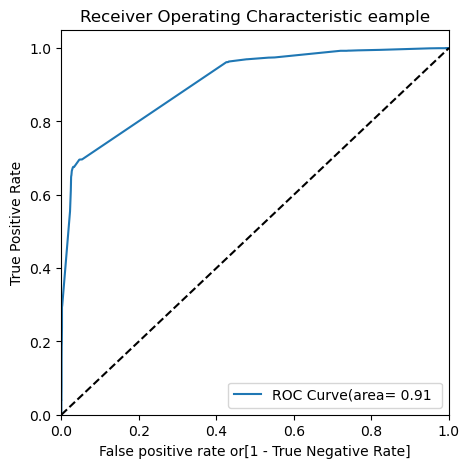

In [84]:
draw_roc(y_train_pred_final['Converted_val'],y_train_pred_final['Converted'])

# Finding optiman cutoff point

In [85]:
nums = [float(x)/10 for x in range(10)]
for i in nums:
    y_train_pred_final[i] =y_train_pred_final['Converted'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted_val,Converted,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.453948,0,1,1,1,1,1,0,0,0,0,0
1,0,0.048425,0,1,0,0,0,0,0,0,0,0,0
2,0,0.003321,0,1,0,0,0,0,0,0,0,0,0
3,1,0.875761,1,1,1,1,1,1,1,1,1,1,0
4,0,0.005205,0,1,0,0,0,0,0,0,0,0,0


In [86]:
nums

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [87]:
import pandas as pd
from sklearn import metrics
# Assume 'nums' is a list of probability columns in your DataFrame
cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensi', 'speci'])
# Convert 'Converted' to binary if necessary
y_train_pred_final['Converted'] = y_train_pred_final['Converted'].apply(lambda x: 1 if x > 0.5 else 0)
# Iterate over each column in 'nums' to create cutoff predictions
for i in nums:
    # Convert the probability values to binary labels using a threshold of 0.5
    y_train_pred_final[f'pred_label_{i}'] = y_train_pred_final[i].apply(lambda x: 1 if x > 0.5 else 0)
    # Calculate confusion matrix with binary labels
    cm1 = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[f'pred_label_{i}'])
    # Calculate accuracy, sensitivity, and specificity
    total = sum(sum(cm1))
    acc1 = (cm1[0, 0] + cm1[1, 1]) / total
    sensi = cm1[1, 1] / (cm1[1, 0] + cm1[1, 1]) if (cm1[1, 0] + cm1[1, 1]) != 0 else 0
    speci = cm1[0, 0] / (cm1[0, 0] + cm1[0, 1]) if (cm1[0, 0] + cm1[0, 1]) != 0 else 0
    # Create a temporary DataFrame for the new row
    new_row = pd.DataFrame({'prob': [i], 'accuracy': [acc1], 'sensi': [sensi], 'speci': [speci]})
    # Use pd.concat to add the new row to cutoff_df
    cutoff_df = pd.concat([cutoff_df, new_row], ignore_index=True)
# Display final cutoff dataframe
print(cutoff_df)


   prob  accuracy     sensi     speci
0   0.0  0.275424  1.000000  0.000000
1   0.1  0.642028  1.000000  0.505956
2   0.2  0.644068  1.000000  0.508772
3   0.3  0.646265  1.000000  0.511804
4   0.4  0.978970  1.000000  0.970977
5   0.5  1.000000  1.000000  1.000000
6   0.6  1.000000  1.000000  1.000000
7   0.7  0.988387  0.957835  1.000000
8   0.8  0.988387  0.957835  1.000000
9   0.9  0.838198  0.412536  1.000000


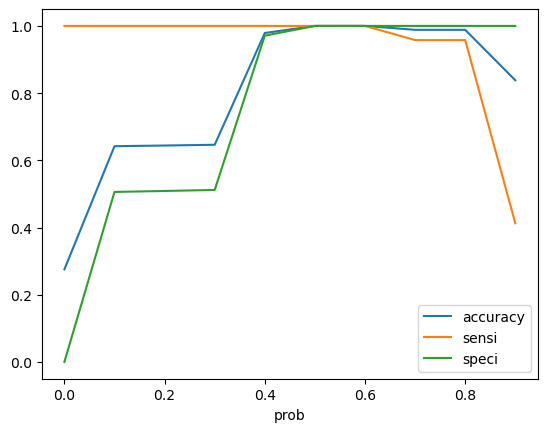

In [88]:
cutoff_df.plot.line(x ='prob', y = ['accuracy', 'sensi','speci'])
plt.show()

In [89]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted'].map(lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted_val,Converted,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,pred_label_0.0,pred_label_0.1,pred_label_0.2,pred_label_0.3,pred_label_0.4,pred_label_0.5,pred_label_0.6,pred_label_0.7,pred_label_0.8,pred_label_0.9,final_predicted
0,0,0,0,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1
4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


# Step 8: making Predictionon the test dataset

In [90]:
x_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]]= scaler.fit_transform(x_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])

In [91]:
x_test = x_test[col]
x_test

,Lead Origin_Lead Add Form,Last Activity_Had a Phone Conversation,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Already a student,Tags_Closed by Horizzon,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Tags_wrong number given,Last Notable Activity_SMS Sent,Do Not Email
3504,0,0,1,0,0,0,1,0,0,0,0,0
4050,1,0,1,0,0,0,0,1,0,0,1,0
7201,0,0,1,0,0,0,0,0,0,0,1,1
1196,0,0,1,0,0,0,1,0,0,0,0,0
8219,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6508,0,0,1,0,0,0,1,0,0,0,1,0
315,0,0,1,0,0,0,0,0,0,0,0,0
3766,0,0,1,0,0,0,0,1,0,0,0,0
8043,0,0,1,0,0,0,0,1,0,0,1,0


In [92]:
x_test_sm = sm.add_constant(x_test)

In [95]:
print("Training data columns (model):", res.model.exog.shape[1])  # Check number of columns in training data
print("Test data columns:", x_test_sm.shape[1])  # Check number of columns in test data


Training data columns (model): 14
Test data columns: 14


In [96]:
print(x_test_sm.dtypes)  # Check data types
print(x_test_sm.isnull().sum())  # Check for null values


const                                                   float64
const                                                   float64
Lead Origin_Lead Add Form                                 int32
Last Activity_Had a Phone Conversation                    int32
What is your current occupation_Unemployed                int32
What is your current occupation_Working Professional      int32
Tags_Already a student                                    int32
Tags_Closed by Horizzon                                   int32
Tags_Ringing                                              int32
Tags_Will revert after reading the email                  int32
Tags_switched off                                         int32
Tags_wrong number given                                   int32
Last Notable Activity_SMS Sent                            int32
Do Not Email                                              int64
dtype: object
const                                                   0
const                           

In [106]:
# Print the shape of the model's training data
print("Shape of model's training data:", res.model.exog.shape)

# Print the shape of the test data
print("Shape of test data:", x_test_sm.shape)


Shape of model's training data: (6372, 14)
Shape of test data: (2731, 13)


In [108]:
# Check for duplicated column names
duplicated_columns = x_test_sm.columns[x_test_sm.columns.duplicated()]
print(f"Duplicated columns: {duplicated_columns.tolist()}")


Duplicated columns: []


In [110]:
y_test_pred = res.predict(x_test_sm)
print("First 10 predictions:", y_test_pred[:10])


First 10 predictions: 3504    0.003944
4050    0.991125
7201    0.163179
1196    0.003944
8219    0.048425
8747    0.315139
9048    0.097420
6524    0.048425
7693    0.163179
8187    0.490038
dtype: float64


In [111]:
y_pred1 = pd.DataFrame(y_test_pred)
y_pred1.head()

,0
3504,0.003944
4050,0.991125
7201,0.163179
1196,0.003944
8219,0.048425


In [112]:
y_test_df = pd.DataFrame(y_test)

In [114]:
y_pred1.reset_index(drop = True, inplace = True)
y_test_df.reset_index(drop = True, inplace = True)

In [119]:
y_pred_final =  pd.concat([y_test_df, y_pred1], axis = 1)
y_pred_final.head()

,Converted,0
0,0,0.003944
1,1,0.991125
2,0,0.163179
3,0,0.003944
4,1,0.048425


In [142]:
y_pred_final = y_pred_final.rename(columns={0: 'Converted_prob','converted' : 'Converted_val'})

In [143]:
y_pred_final

,Converted,final_predicted,final_predicted_binary
0,1,0,1
1,0,0,0
2,1,0,1
3,1,1,0
4,0,0,0


In [141]:
y_pred_final['final_predicted'] = y_train_pred_final['Converted'].map(lambda x: 1 if x > 0.4 else 0)
y_pred_final.head()

,Converted,final_predicted,final_predicted_binary
0,1,0,1
1,0,0,0
2,1,0,1
3,1,1,0
4,0,0,0


In [135]:
#import pandas as pd
#from sklearn import metrics

# Example DataFrame creation (replace with your actual DataFrame)
y_pred_final = pd.DataFrame({
    'Converted': [1, 0, 1, 1, 0],
    'final_predicted': [0.9, 0.1, 0.6, 0.4, 0.2]  # Continuous probabilities
})

# Check data types
print(y_pred_final.dtypes)

# Convert predictions to binary
y_pred_final['final_predicted_binary'] = (y_pred_final['final_predicted'] > 0.5).astype(int)

# Calculate accuracy
acc = metrics.accuracy_score(y_pred_final["Converted"], y_pred_final["final_predicted_binary"])
print("Accuracy:", acc)


Converted            int64
final_predicted    float64
dtype: object
Accuracy: 0.8
